In [37]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D 
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import os
import zlib
import zipfile
import matplotlib.image as mpimage

In [7]:
local_zip = 'data/cats_and_dogs_filtered.zip'
zip_ = zipfile.ZipFile(local_zip)
zip_.extractall()
zip_.close()

In [14]:
base = 'data/cats_and_dogs_filtered'
train_dir = os.path.join(base, 'train')
validation_dir = os.path.join(base, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

train_cats_dir = os.path.join(validation_dir, 'cats')
train_dogs_dir = os.path.join(validation_dir, 'dogs')

In [23]:
all_files_cats = os.listdir(train_cats_dir)
cats_files = [os.path.join(train_cats_dir, file) for file in all_files_cats][:25]
all_files_dogs = os.listdir(train_dogs_dir)
dogs_files = [os.path.join(train_dogs_dir, file) for file in all_files_dogs][:25]

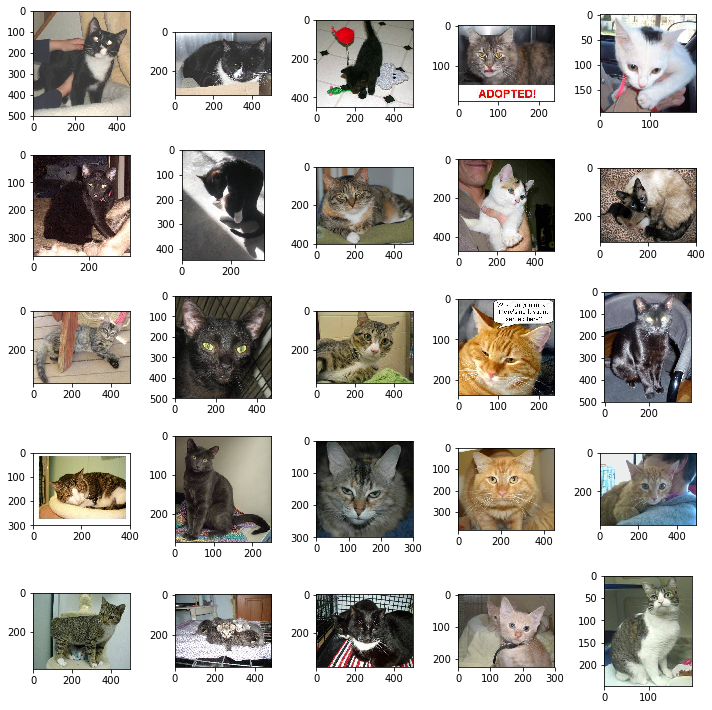

In [31]:
plt.figure(figsize=(10,10))
for idx, img_path in enumerate(cats_files):
    plt.subplot(5,5, idx+1)
    img = mpimage.imread(img_path)
    plt.imshow(img)
plt.tight_layout()

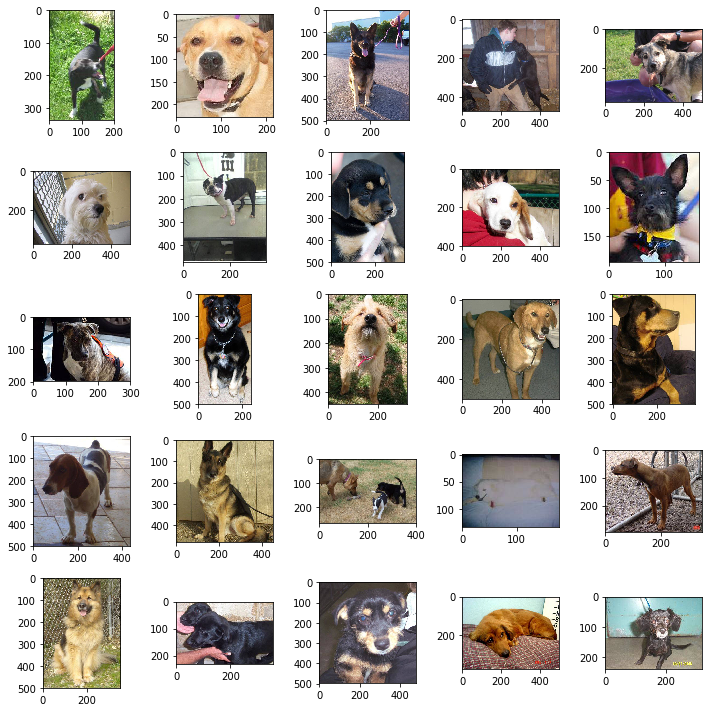

In [32]:
plt.figure(figsize=(10,10))
for idx, img_path in enumerate(dogs_files):
    plt.subplot(5,5, idx+1)
    img = mpimage.imread(img_path)
    plt.imshow(img)
plt.tight_layout()

In [44]:
input = (150,150,3)

model = Sequential( [
    Conv2D(32, (3,3), input_shape=input),
    MaxPool2D(pool_size=(2,2)),
    
    Conv2D(32, (3,3), input_shape=input),
    MaxPool2D(pool_size=(2,2)),
    
    Conv2D(filters=64, kernel_size=(3,3), input_shape=input),
    MaxPool2D(pool_size=(2,2)),
    
    Flatten(),    
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                5308480   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
__________

In [38]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [41]:
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [46]:
history  = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)
#1: - 98s - loss: 0.8197 - acc: 0.5150 - val_loss: 0.6857 - val_acc: 0.5870
#2:  - 58s - loss: 0.6449 - acc: 0.5965 - val_loss: 0.6263 - val_acc: 0.6470

Epoch 1/1
 - 58s - loss: 0.6449 - acc: 0.5965 - val_loss: 0.6263 - val_acc: 0.6470
